In [2]:
import numpy as np
import pandas as pd
import itertools
import pickle
import datetime
from tqdm.notebook import tqdm

#%matplotlib inline

In [865]:
%run get_five_letter_words

Letters in 5-letter words:
a, b, c, d, e, f, g, h, i, j, k, l, m, n, o, p, q, r, s, t, u, v, x, y, z, å, æ, ø
Number of 5-letter words: 8,195


In [35]:
%run wordle_classes

In [101]:
def fun():
    print('hej')
    
    
d = {'a':fun}

#d['a']

hej


In [103]:
ws == 'exit'

False

[0, 0, 2, 1, 0]

In [94]:
txt = input("Type something to test this out: ")

In [87]:
ws = WordleSolver()
# TODO:
# Create reset function
# get_information(word)
# Output: expected number of words after guess:
# Actual number of words after guess: 
# align print/get/show
# Make command line tool:
#
# Welcome to the Wordle Solver
#
# There are 8195 words to guess from.
# Your guesses:
#   1) "sarte" (10020)
#   Waiting for guess number 2...
# Options: 
#   - Place guess (g)
        - write your guess:
        - what was the response (e.g. 10020 for yellow,gray,gray,green,black):
        Your guess was expected to yield 100 possible answers.
        With that response there are now 200 possible answers.
#   - Show best 10 guesses (b)
#   - Show 10 possible answers (p)
#   - Show best 10 first two guesses (t)
#   - Reset guesses (r)

############################
Welcome to the wordle solver
############################
Wait while the program starts


In [88]:
ws.register_guess('saren',[0,1,0,1,0])

In [89]:
ws.get_best_guesses(2)

,guess,guess_idx,is_possible_answer,information,expected_nb_words
0,blegt,695,False,4.544918,3.21
1,meldt,4312,False,4.415961,3.51


In [90]:
ws.register_guess('blegt',[0,0,1,0,0]) #mjave

In [91]:
ws.get_best_guesses(4)

,guess,guess_idx,is_possible_answer,information,expected_nb_words
0,hvide,2848,False,3.277613,1.13
1,heavy,2648,True,3.277613,1.13
2,opøve,4971,False,3.095795,1.29
3,hvalp,2840,False,3.095795,1.29


In [92]:
ws.register_guess('hvide',[0,1,0,0,2]) 

In [93]:
ws.print_possible_answers()

Listing top 10 possible answers:
mjave
(1 total possible answers)


In [71]:
ws.register_guess('koldt',[0,0,0,0,0])

In [74]:
ws.register_guess('umage',[0,1,2,0,2])

In [76]:
ws.print_possible_answers()

Listing top 10 possible answers:
beame
miave
mjave
(3 total possible answers)


In [44]:
RR = np.loadtxt('two_guess_informations.txt')

In [54]:
best_args = np.argsort(-RR.flatten())

In [55]:
cols = best_args % RR.shape[0]
rows = best_args // RR.shape[0]

In [67]:
[(ws.words[r],ws.words[c],RR[r,c],(1/2)**RR[r,c]*len(RR)) for r,c in zip(rows[:10],cols[:10])]

[('saren', 'koldt', 10.014474010447984, 7.923040756507713),
 ('saren', 'goldt', 9.992613172280471, 8.04401104019764),
 ('saner', 'koldt', 9.9768889289665, 8.132163971552),
 ('ranes', 'koldt', 9.958730198590429, 8.235167735796718),
 ('saner', 'goldt', 9.955196401175021, 8.255364023897652),
 ('salen', 'kridt', 9.942978801816938, 8.32557221743343),
 ('ranes', 'goldt', 9.939588045177839, 8.345162767656062),
 ('saren', 'bildt', 9.938358169269735, 8.35227992709431),
 ('arnes', 'koldt', 9.93802486318972, 8.35420977866102),
 ('saren', 'mildt', 9.933293798978516, 8.381650907359209)]

In [37]:
df_best = ws.get_best_guesses(top_n = 20)
df_best.head(5)

,guess,guess_idx,is_possible_answer,information,expected_nb_words
0,sarte,5897,True,6.171157,113.72
1,tales,6908,True,6.143298,115.94
2,saren,5892,True,6.136284,116.50
3,rates,5529,True,6.130887,116.94
4,saner,5886,True,6.111895,118.49


In [38]:
ws.register_guess('sarte',[0,0,0,1,0])

In [39]:
ws.get_best_guesses(top_n = 10)

,guess,guess_idx,is_possible_answer,information,expected_nb_words
0,uligt,7525,True,5.142329,3.65
1,dingl,1259,False,4.976068,4.10
2,mulig,4471,False,4.957941,4.15
3,dingo,1260,False,4.891419,4.35
4,uklog,7514,False,4.887922,4.36
5,bolig,765,False,4.884793,4.37
6,lingo,3952,False,4.875288,4.40
7,fluid,1931,False,4.874882,4.40
8,udlov,7414,False,4.868794,4.42
9,login,3991,False,4.858485,4.45


In [40]:
ws.register_guess('uligt',[0,0,1,0,1])

In [41]:
ws.print_possible_answers()

Listing top 10 possible answers:
bitch
fytin
intim
kitin
motiv
optik
pitch
tonic
(8 total possible answers)


In [42]:
ws.register_guess('motiv',[1,0,2,2,0])

In [43]:
ws.print_possible_answers()

Listing top 10 possible answers:
intim
(1 total possible answers)


In [974]:
guess1_idx_vec = list(df_best['guess_idx'])
guess1_idx_vec

[5897,
 6908,
 5892,
 5529,
 5886,
 5505,
 341,
 327,
 5518,
 5867,
 5859,
 6946,
 6995,
 5467,
 3841,
 5525,
 3961,
 3840,
 1158,
 7234]

In [979]:
nb_guesses = ws.R.shape[0]
nb_possible_answers = ws.R.shape[1]
informations = np.zeros((nb_guesses,nb_guesses))
# Each guess pair leads to multiple response pairs.
for _counter, guess1_idx in enumerate(guess1_idx_vec):
    _responses1, _ = np.unique(ws.R[guess1_idx,:], return_counts = True)
    for guess2_idx in range(nb_guesses):
        
        _information = 0
        for _response1 in _responses1:
            response1_args = np.argwhere(ws.R[guess1_idx,:] == _response1).ravel()
            _, _counts2 = np.unique(ws.R[guess2_idx,response1_args], return_counts = True)
            # Probability of getting pattern1 and pattern2
            _p = _counts2 / nb_possible_answers # Arrays for all response2
            _information +=  -np.sum(_p*np.log2(_p))
        if guess2_idx % 100 == 0:
            print(_counter,guess2_idx,_information)
        informations[guess1_idx, guess2_idx] = _information

np.savetxt('two_guess_informations.txt',informations)

0 0 7.839519418586155
0 100 7.544119194125363
0 200 8.332964404538313
0 300 6.994976846900451
0 400 8.176407469424902
0 500 8.18451161481562
0 600 7.60418153973585
0 700 9.769733246016157
0 800 7.995174692754612
0 900 8.94516666972235
0 1000 7.6724942973246675
0 1100 7.733845139601006
0 1200 8.588245987644859
0 1300 8.931760692344888
0 1400 8.816181430583764
0 1500 8.952060545517515
0 1600 8.419150724651688
0 1700 8.62693420977522
0 1800 7.943496680965602
0 1900 8.357375477987844
0 2000 7.763103616752993
0 2100 7.883601775210757
0 2200 8.566770936860769
0 2300 8.165172913207122
0 2400 8.321058072003343
0 2500 8.41998971212835
0 2600 7.89295514393587
0 2700 7.613397755424598
0 2800 7.770906479836826
0 2900 8.1640745684477
0 3000 9.20329794590031
0 3100 7.8361945200005865
0 3200 7.408748756267482
0 3300 8.67995664878313
0 3400 9.167583451813462
0 3500 9.128880883979411
0 3600 7.791092069098157
0 3700 8.616692474120724
0 3800 8.324588833072506
0 3900 8.288840765110752
0 4000 9.24584913414

NameError: name 'np' is not defined

In [934]:
ws.register_guess('sarte', [1,1,1,0,0])

In [876]:
# show remaining words
ws.register_guess('brags', [0,2,2,0,2])
ws.print_possible_answers()

Listing top 10 possible answers:
drams
draps
krads
kraks
krams
krans
kraps
kravs
orals
prajs
13 total possible answers


In [935]:
df_best1 = ws.get_best_guesses()
df_best1

,guess,is_possible_answer,information,expected_nb_words
0,brags,True,3.476091,3.954075
1,grabs,True,3.476091,3.954075
2,glads,False,3.447989,4.031853
3,grads,True,3.438166,4.059398
4,drags,True,3.438166,4.059398
...,...,...,...,...
8190,tøjte,False,0.156491,39.477003
8191,søret,False,-0.000000,44.000000
8192,sarte,False,-0.000000,44.000000
8193,satte,False,-0.000000,44.000000


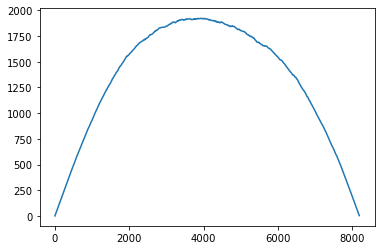

In [949]:
import matplotlib.pyplot as plt
data = []
x = list(np.arange(0,8195,10))
for _x in x:
    data.append(len(set(df_best0['guess'].loc[:_x]).intersection(set(df_best1['guess'].loc[:_x]))))
    
plt.plot(x,[x-data for x,data in zip(x,data)])
#plt.plot(x,x)

##### Best first guess
1. For each word combination, get the response pattern for lookup
2. For each word, get the probabiity $p_i$ of each pattern and calculate the expected information as $$ I =  -\sum_i p_i \log_2(p_i)$$ 
This is the list for the initial guess
3.  After the first guess and response, only a subset of words is left. Find the next best guess as follows: For each word in the total list, get the probability $p_i$ of each pattern (given the subset of words) and calculate again the expected information. This is the next best guess.

##### Best guess considering two guesses
4. Suppose "sarte" is chosen as the first word. Calculate the probability $p_i$ of each pattern_1. Each pattern_1 leads to a subset of words. For each pattern_1, run through all words (in the full list) and calculate probability $q_j$ for each pattern_2 (given the subset of words). The probability for getting the pattern combination pattern_1 + pattern_2 is $p_i q_j$. Hence $$ I = -\sum_{i,j} p_iq_j\log_2(p_iq_j) $$
where $i$ runs through all pattern_1 and $j$ runs through all pattern_2

In [953]:
# TODO: Calulate 2-level best words for a top of the 1-level best words. # 
# Take top 50 as the first guess, and all for the next guess
# Approximate hours:
0.007*50*8195/60/60


0.7967361111111112

array([[4.02486896, 4.74149814, 6.48062822, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])